### Connecting to SQL DB

**Pandas** - data reading and manipulation  
**Sqlalchemy** - acts as a bridge between sql and python - DB API  
**psycopg2** - postgresql driver  
**os** - its path  
**python-dotenv** - load credentials from an environment file  
**openpyxl** - interact excel  


pip install dotenv  
pip install autoviz  
pip install openpyxl  
pip install pandas sqlalchemy  
pip install pymysql

In [5]:
import pandas as pd #data analysis/read sql
from sqlalchemy import create_engine #bridge btwn sql and python
import os #avoiding to hardcode
from dotenv import load_dotenv #env file

In [23]:
load_dotenv()
database_url= os.getenv("DATABASES_URL")


In [7]:
engine = create_engine(database_url)

In [22]:
#for my aiven db
load_dotenv()
database_url= os.getenv("DATA")


In [69]:
purchase_df.to_sql('purchase_data', engine, if_exists='append',index=False, schema="customer_data")

637

In [70]:
transaction_df.to_sql('transaction_data', engine, if_exists='append',index=False, schema="customer_data")

836

In [8]:
purchase_df = pd.read_csv("purchase_data.csv")
transaction_df = pd.read_excel("transaction_data.xlsx")



In [73]:
p_query = '''
select * from customer_data.purchase_data pd;
'''

In [67]:
t_query = '''
select * from customer_data.transaction_data td;
'''

In [ ]:
purchase_df = pd.read_sql(p_query, con=engine)
transaction_df = pd.read_sql(t_query, con=engine)

In [96]:
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [11]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Checking missing values

In [44]:
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [45]:
purchase_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Checking the number of records and columns

In [51]:
transaction_df.shape

(264835, 8)

In [52]:
purchase_df.shape

(72637, 3)

### Dropping duplicates

In [75]:
transaction_df = transaction_df.drop_duplicates()

In [76]:
purchase_df = purchase_df.drop_duplicates()

### Fix data types

In [77]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  datetime64[ns]
 1   STORE_NBR       264835 non-null  int64         
 2   LYLTY_CARD_NBR  264835 non-null  int64         
 3   TXN_ID          264835 non-null  int64         
 4   PROD_NBR        264835 non-null  int64         
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [12]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [79]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Extract month and year

In [80]:
transaction_df['YEAR'] = transaction_df['DATE'].dt.year

In [81]:
transaction_df['MONTH'] = transaction_df['DATE'].dt.month

### Merge the tables

In [14]:
merged_df = transaction_df.merge(purchase_df, on='LYLTY_CARD_NBR', how='left')

In [15]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


### Basic Data Analysis
1. Top 10 most purchased product  
2. Total sales by customer life stage  
3. Average spend per customer category

In [83]:
top_products = (merged_df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10))

In [84]:
top_products

PROD_NAME
Dorito Corn Chp     Supreme 380g            6509
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Tostitos Splash Of  Lime 175g               6234
Tyrrells Crisps     Ched & Chives 165g      6227
Kettle 135g Swt Pot Sea Salt                6212
Infuzions Thai SweetChili PotatoMix 110g    6206
Thins Potato Chips  Hot & Spicy 175g        6185
Name: PROD_QTY, dtype: int64

In [99]:
average_spend = (merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean().sort_values(ascending=True))

In [100]:
average_spend

PREMIUM_CUSTOMER
Budget        7.258838
Premium       7.281575
Mainstream    7.361106
Name: TOT_SALES, dtype: float64

In [89]:
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [98]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,MIDAGE SINGLES/COUPLES,Budget


In [91]:
sales_by_lifestage = (merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False))

In [92]:
sales_by_lifestage

LIFESTAGE
OLDER SINGLES/COUPLES     402420.75
RETIREES                  366470.90
OLDER FAMILIES            353767.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64

### Data Analysis - EDA
1. Time Series Analysis
2. Store Performance
3. Product Perfomance
4. Customer Behaviour

In [107]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
merged_df['MONTH_NAME']=merged_df['DATE'].dt.month_name()

In [ ]:
monthly_sales = (merged_df.groupby(['YEAR', 'MONTH_NAME'])['TOT_SALES'].sum().sort_values(ascending=False))

### Store Performance

In [105]:
store_sales = (merged_df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10))

In [106]:
store_sales

STORE_NBR
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64

### Product Performance
1. Most profitable products

In [16]:
top_product = (merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(5))

In [17]:
top_product

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Name: TOT_SALES, dtype: float64

In [18]:
import seaborn as sns

<Axes: xlabel='TOT_SALES', ylabel='PROD_NAME'>

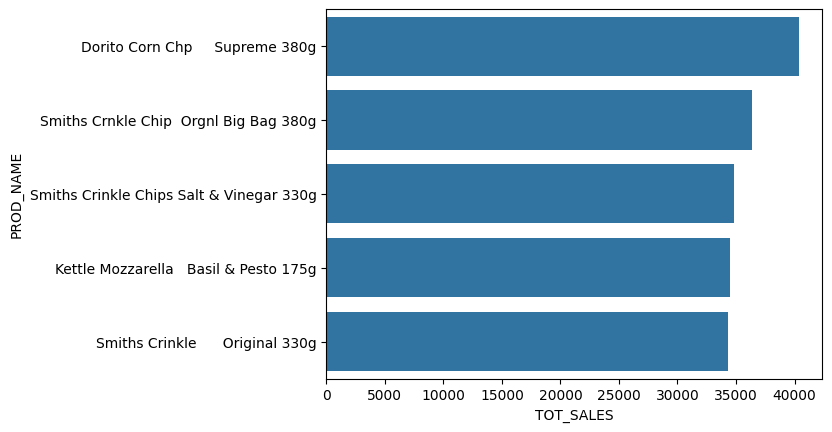

In [19]:
sns.barplot(data=top_product.reset_index(), x='TOT_SALES', y='PROD_NAME')

### Customer Behaviour
1. Which life stage buys the largest quantity

In [20]:
q_lifestage = (merged_df.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False))

In [21]:
q_lifestage

LIFESTAGE
OLDER SINGLES/COUPLES     104203
OLDER FAMILIES             94992
RETIREES                   94166
YOUNG FAMILIES             84561
YOUNG SINGLES/COUPLES      66634
MIDAGE SINGLES/COUPLES     47721
NEW FAMILIES               12847
Name: PROD_QTY, dtype: int64